# Quick looks at early science run

In [1]:
import xarray as xr
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
import cartopy.crs as ccrs   # map plots
import cartopy.feature as cfeature
cmap_prect = cmclimate.cm.WhiteBlueGreenYellowRed

In [3]:
from e3sm_utils import cmclimate

In [9]:
import pandas as pd

In [ ]:
ds_ctl = xr.open_dataset('/global/project/projectdirs/m3312/crjones/e3sm/earlyscience.FC5AV1C-L.ne30.sp1_64x1_1000m.20190415/earlyscience.FC5AV1C-L.ne30.sp1_64x1_1000m.20190415.cam.h0.0001-01.remap.nc').squeeze()
ds_exp = xr.open_dataset('/global/project/projectdirs/m3312/crjones/e3sm/merge_test.FC5AV1C-L.ne30.sp1_64x1_1000m.20190607/run/merge_test.FC5AV1C-L.ne30.sp1_64x1_1000m.20190607.cam.h0.0001-01.remap.nc').squeeze()

In [10]:
dsx = xr.concat([ds_ctl, ds], dim=pd.Index(('CTL', 'NEW'), name='version'))

In [20]:
def awm(da, area):
    weights = area.where(~np.isnan(da))
    sum_dims = [d for d in area.dims if 'version' not in d]
    weights = weights / weights.sum(dim=sum_dims)
    return (weights * da).sum(dim=sum_dims) 

In [46]:
vars_2d = [v for v in dsx if dsx[v].dims == ('version', 'lat', 'lon')]
vars_2d
vars_to_plot = ['AEROD_v', 'AODVIS', 'CLDTOT', 'CLDLOW', 'CLDMED', 'CLDHGH',
                'FLUT', 'FSNTOA', 'LHFLX', 'SHFLX', 'LWCF', 'SWCF',
                'PRECC', 'TMQ', 'TGCLDLWP', 'TGCLDIWP']

In [42]:
def plotm(da, area=dsx.area, **kwargs):
    p = da.plot(x='lon', y='lat', col='version',
                subplot_kws={'projection': ccrs.PlateCarree()},
                transform=ccrs.PlateCarree(),
                cbar_kwargs={'orientation': 'horizontal', 'pad': 0.05, 'aspect': 50},
                **kwargs)
    global_means = awm(da, area)
    for i, ax in enumerate(p.axes.flat):
        ax.coastlines()
        ax.gridlines()
        current_title = ax.get_title()
        ax.set_title(current_title + '  mean = {:0.3f}'.format(global_means.values[i]))
    return p

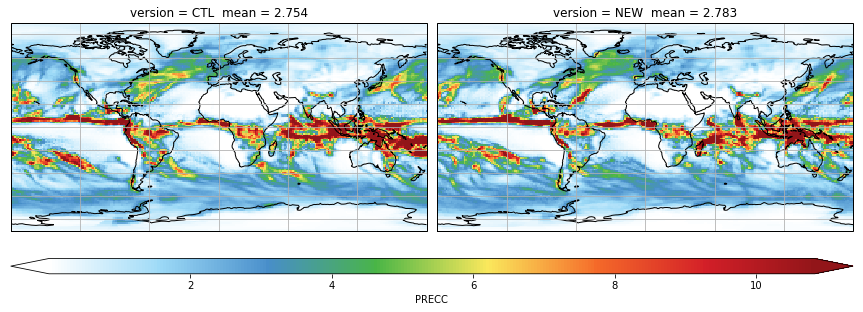

In [50]:
plotm(dsx['PRECC'] * 86400 * 1000, cmap=cmap_prect, robust=True, figsize=(12, 8))

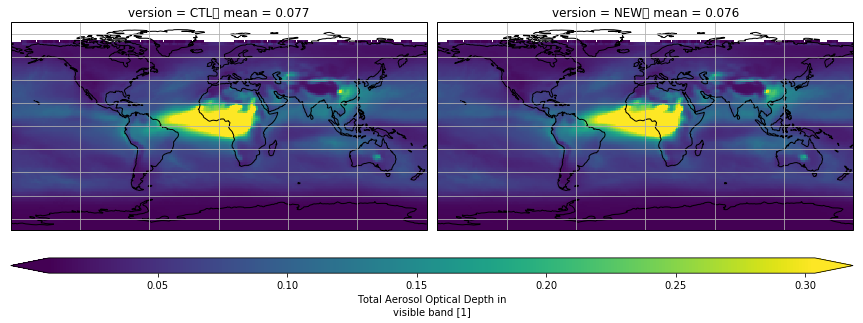

In [41]:
p = plotm(dsx['AEROD_v'], figsize=(12, 8), robust=True)

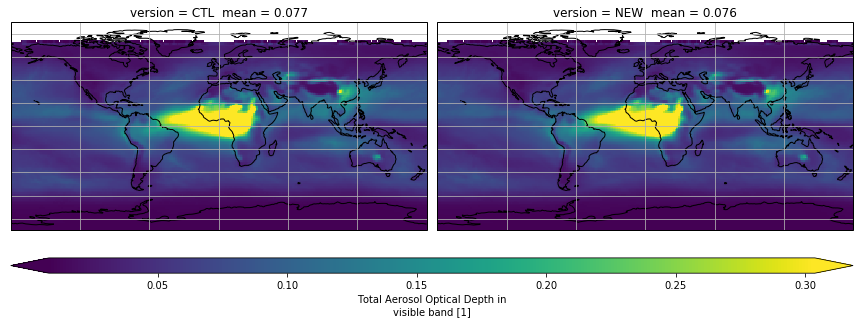

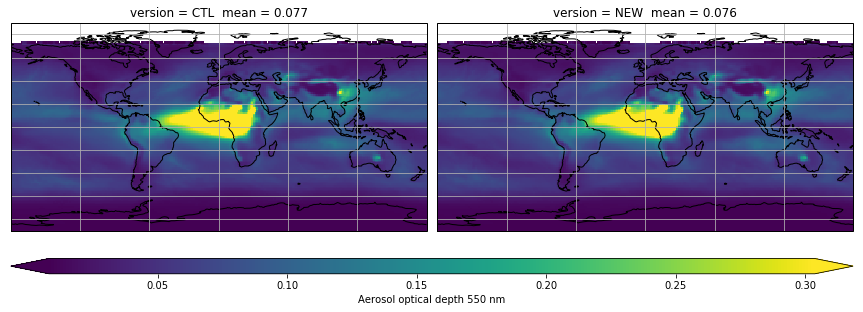

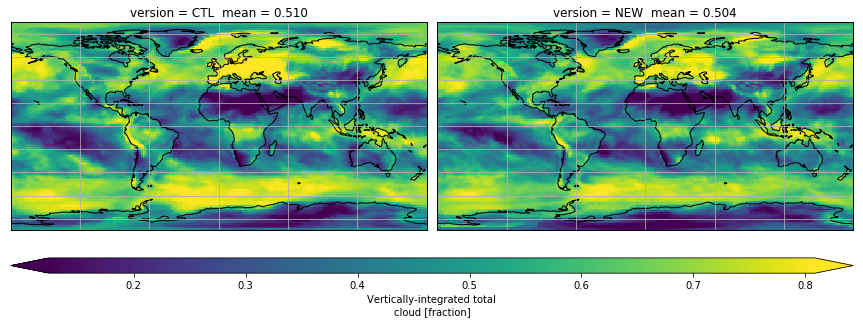

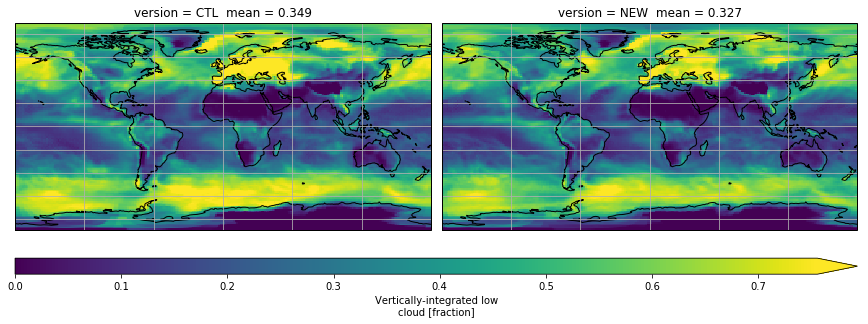

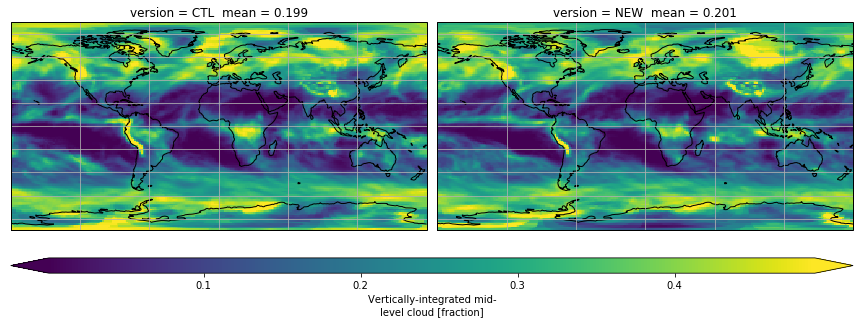

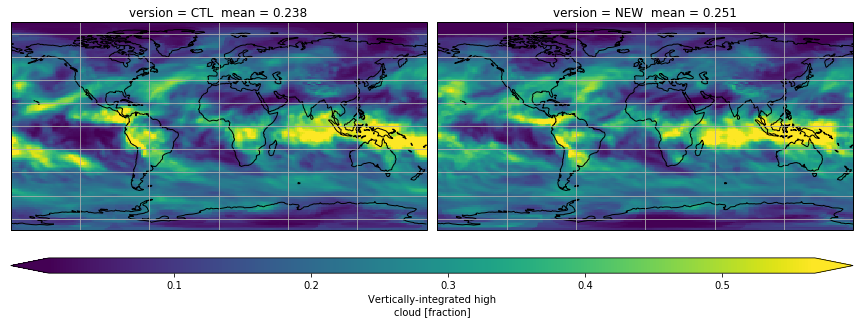

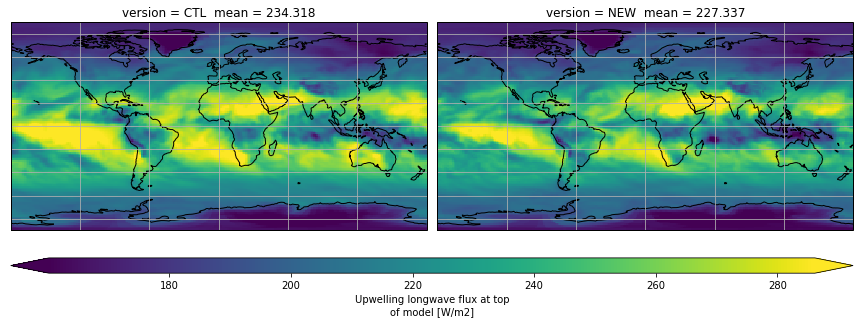

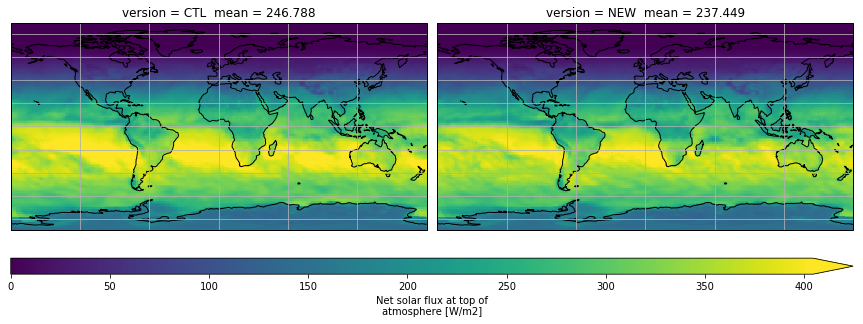

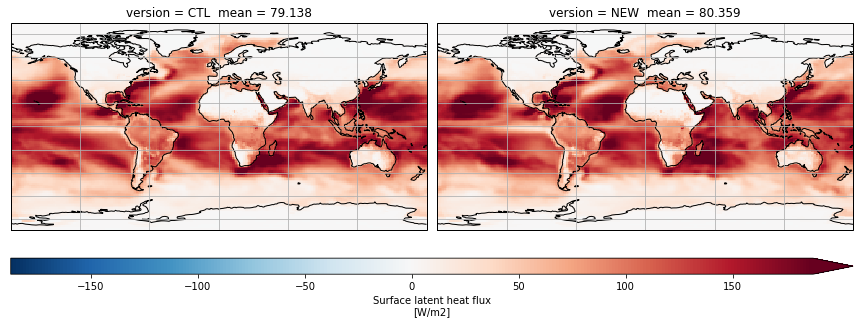

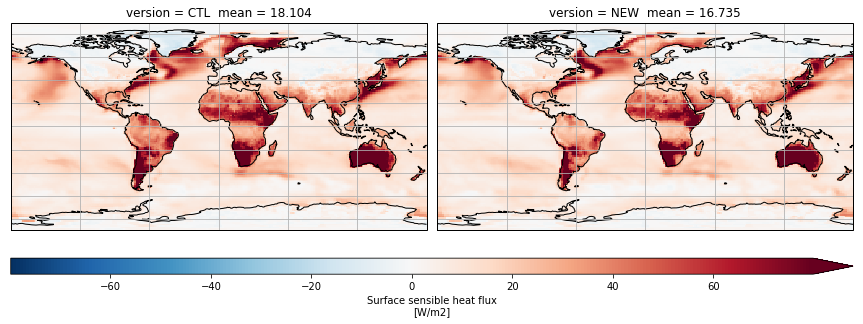

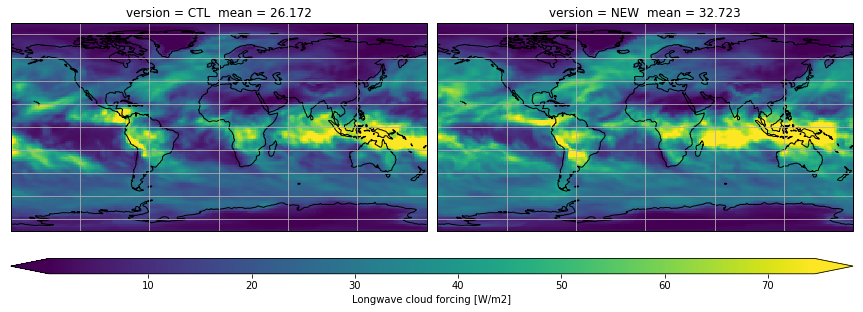

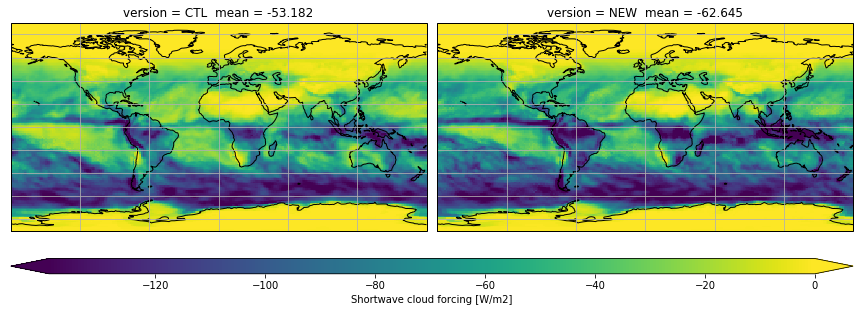

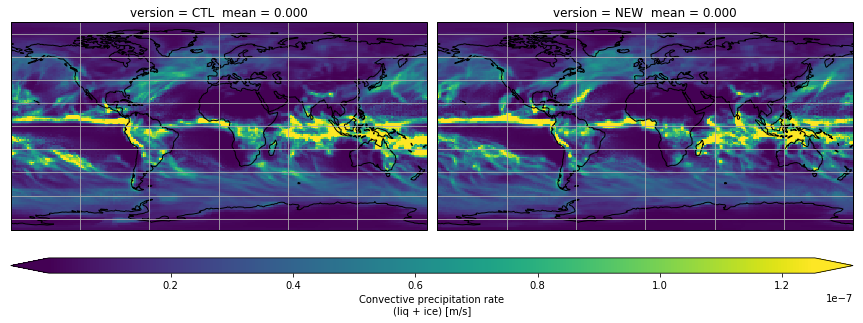

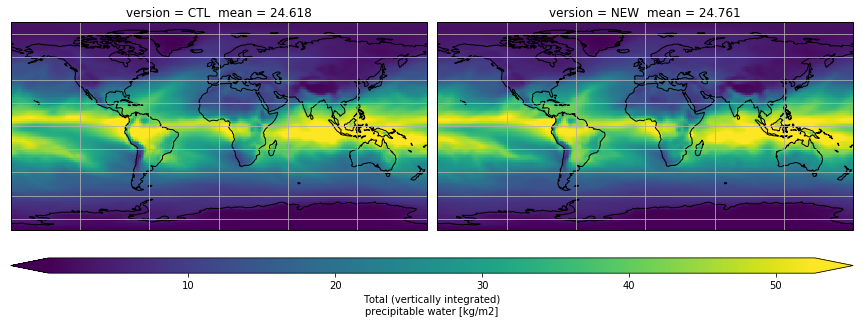

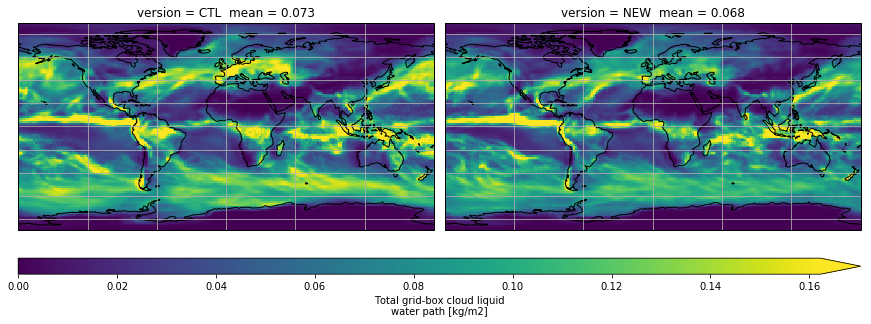

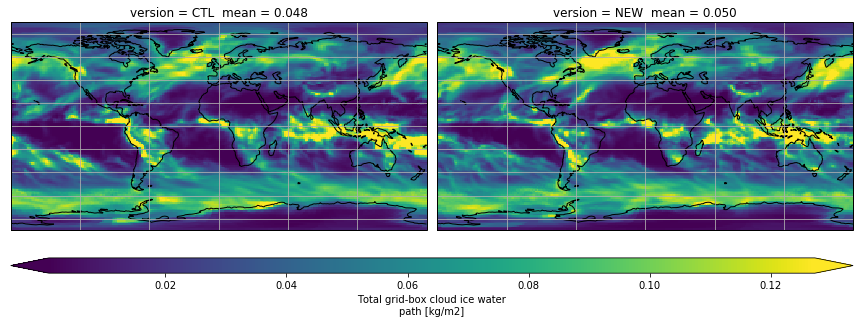

In [47]:
for v in vars_to_plot:
    plotm(dsx[v], figsize=(12, 8), robust=True);

In [8]:
ds_ctl = xr.open_dataset('/global/project/projectdirs/m3312/crjones/e3sm/earlyscience.FC5AV1C-L.ne30.sp1_64x1_1000m.20190415/earlyscience.FC5AV1C-L.ne30.sp1_64x1_1000m.20190415.cam.h0.0001-01.remap.nc')